In this notebook we present an application that consists of the global finite-element mesh plot using the `pydiva2d` module.<br>
To make the work of the users easier, the files corresponding to the mesh will be made available (once I recover them).

In [6]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [7]:
import sys
sys.path.insert(0, "../")
import pydiva2d

# Prepare the input

Indicate the path and names of the 2 mesh files, and define a *figure* directory:

In [8]:
Meshdir = '../data/Mesh/Global/'
meshfile = os.path.join(Meshdir, 'fort.22')
meshtopofile = os.path.join(Meshdir, 'fort.23')
figdir = './figures/GlobalMesh/'

Create a Mesh object and read the information from the files:

In [9]:
GlobalMesh = pydiva2d.Diva2DMesh()
GlobalMesh.read_from(meshfile, meshtopofile)

Create the figure directory if it doesn't exist:

In [10]:
if not(os.path.exists(figdir)):
    os.makedirs(figdir)

# Create the figures

## Without Basemap

In [12]:
fig = plt.figure()
ax = plt.subplot(111)
GlobalMesh.add_to_plot(linewidth=.1)
plt.savefig(os.path.join(figdir, 'GlobalMesh.png'), dpi=300)
plt.close()

## With Basemap

We use the same commands as the previous cell, except that we create a Basemap instance.

In [18]:
from matplotlib import rcParams
rcParams['agg.path.chunksize'] = 10000

/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


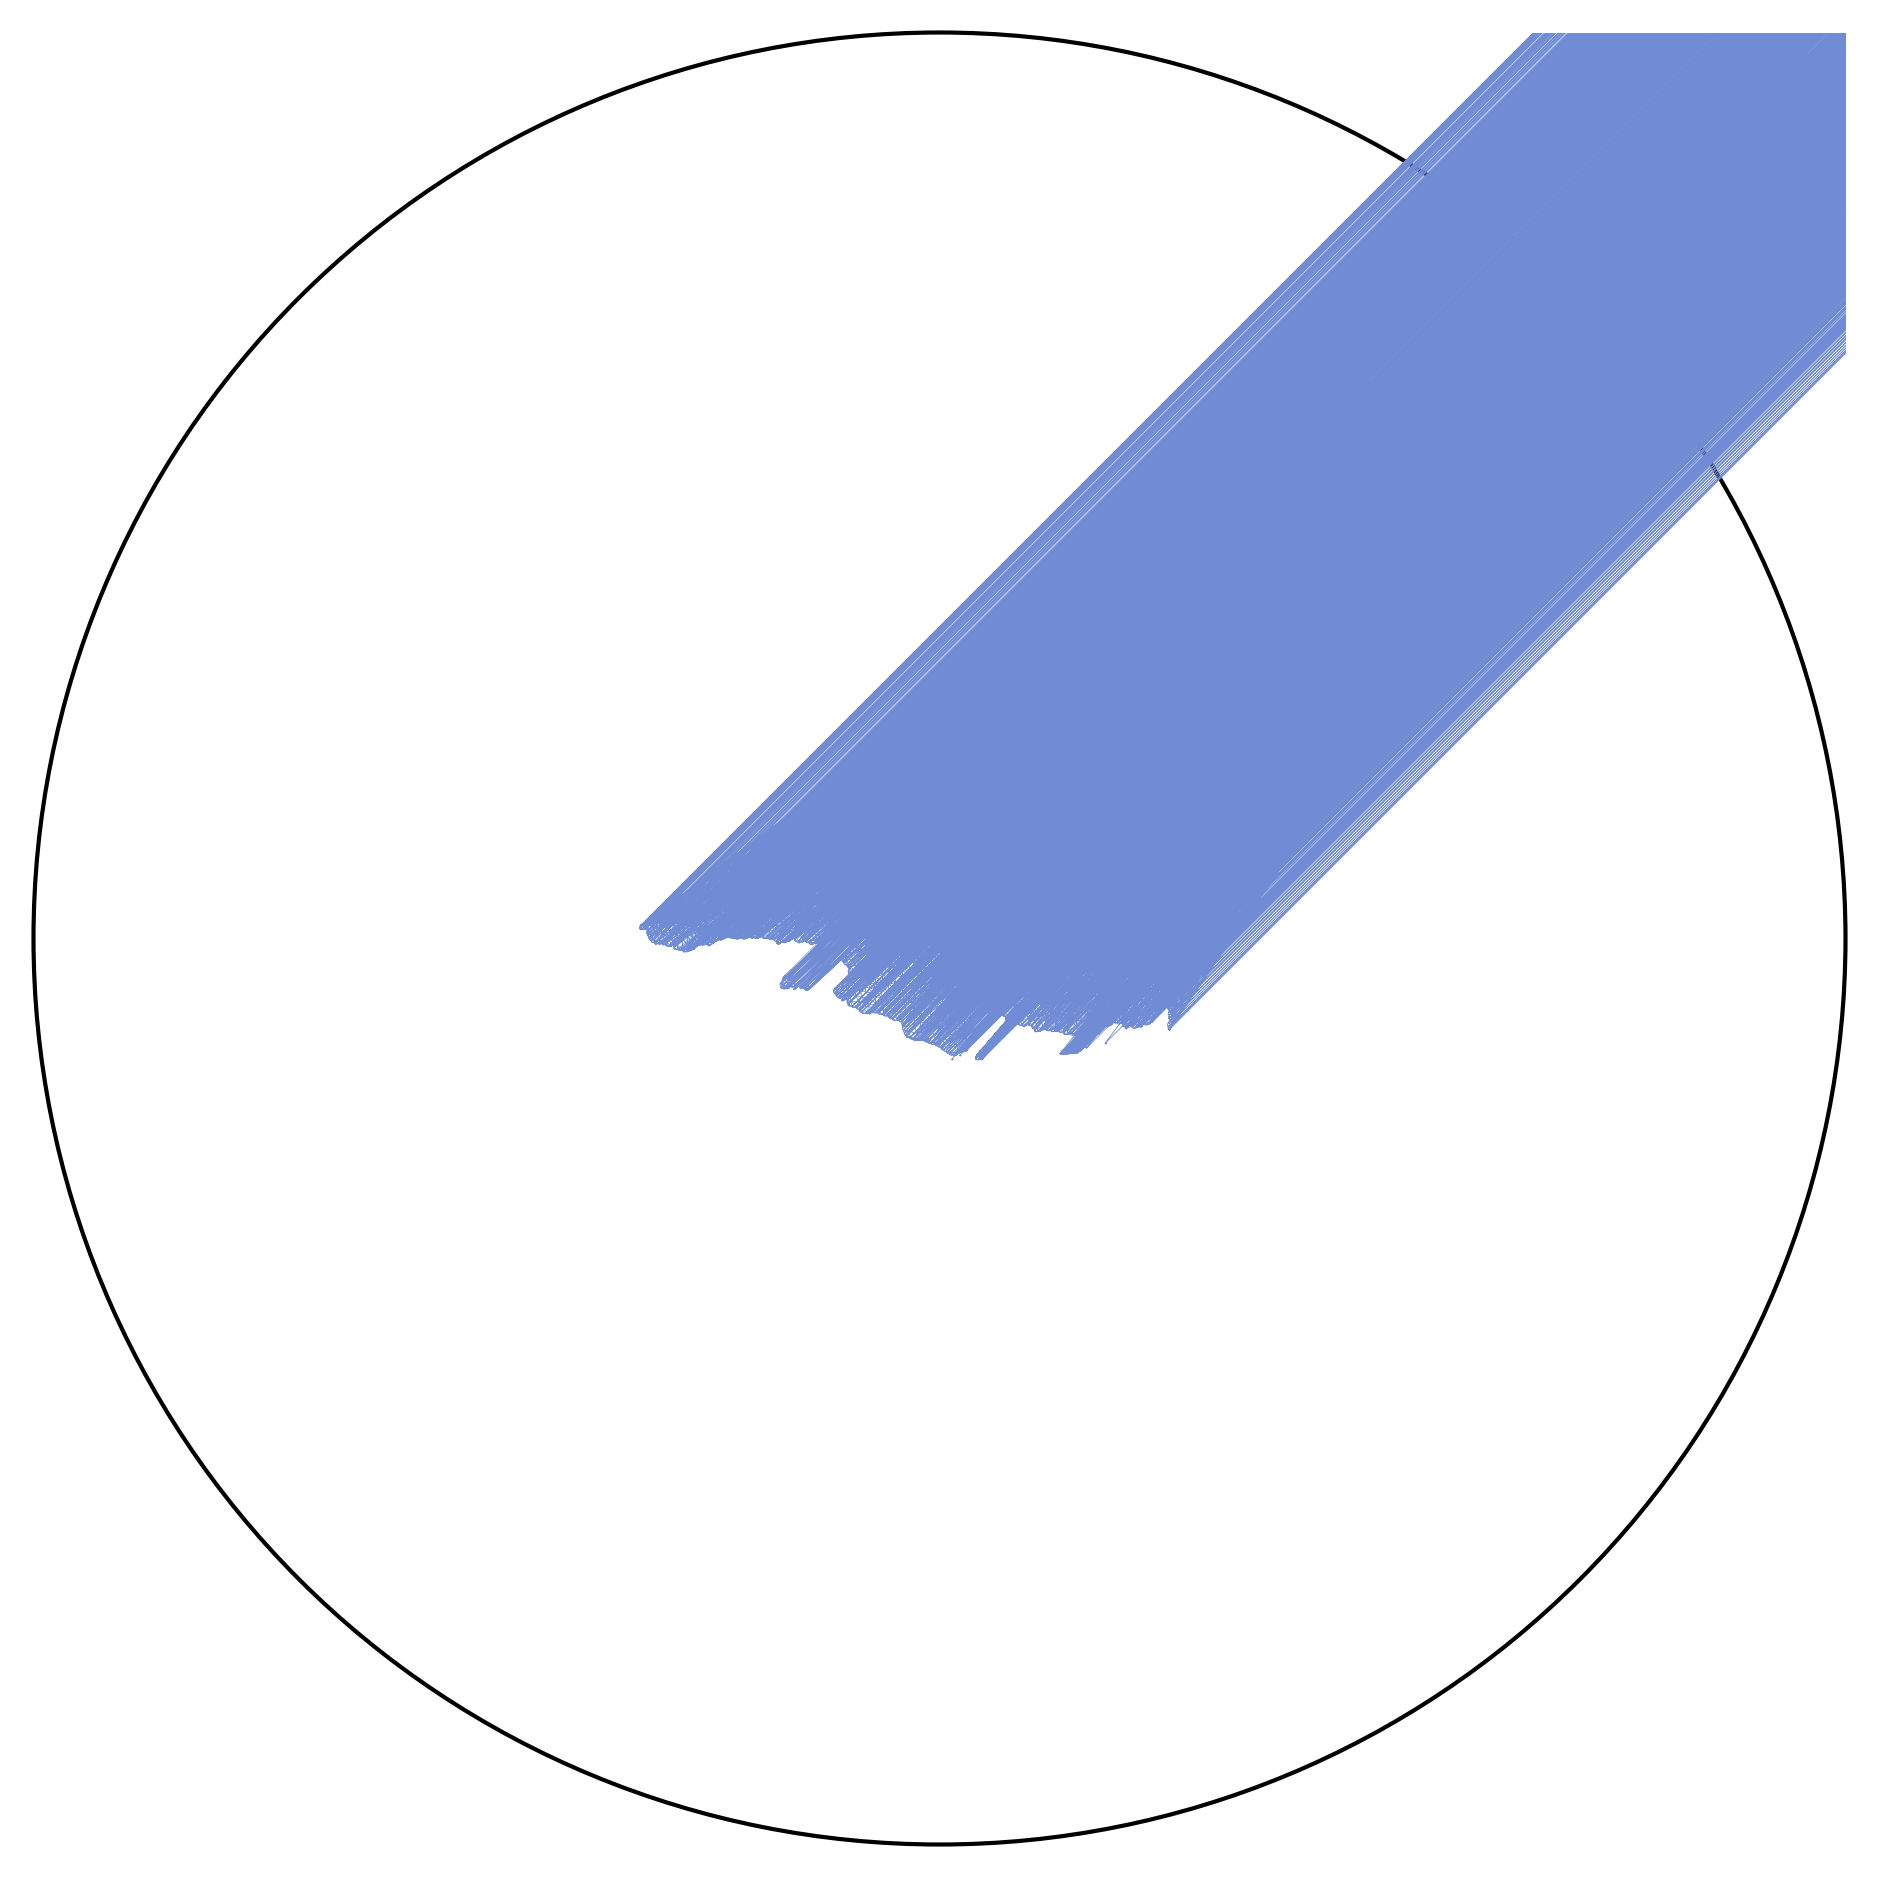

In [25]:
m = Basemap(resolution='l', 
            projection='ortho', 
            lat_0=GlobalMesh.ynode.mean(), 
            lon_0=GlobalMesh.xnode.mean()) 

#m = Basemap(llcrnrlon=GlobalMesh.xnode.min(), llcrnrlat=GlobalMesh.ynode.min(),
#            urcrnrlon=GlobalMesh.xnode.max(), urcrnrlat=GlobalMesh.ynode.max(), 
#            resolution = 'l', epsg=3857)
fig = plt.figure()
#ax = plt.subplot(111)
GlobalMesh.add_to_plot(m=m, linewidth=.1, color=(0.44, 0.55, .83))
#plt.savefig(os.path.join(figdir, 'GlobalMeshBasemap.png'), dpi=300)
plt.show()
plt.close()

# Generate an animation (if you have time)

Something you can try during coffee time, as it can take a while.<br>
We repeat the previous cells in a loop in which we modify the central longitude in the `Basemap`.

In [56]:
lon_init = 0.
lon_end = 3.
lon_step = 1.

In [58]:
for index, lonc in enumerate(np.arange(lon_init, lon_end, lon_step)):
    m = Basemap(resolution='c', projection='ortho',lat_0=30., lon_0=lonc) 
    ax = plt.subplot(111)
    Mesh.add_to_plot(m, linewidth=.1, color=(0.44, 0.55, .83))
    plt.savefig(os.path.join(figdir, "globalmesh{0}.png".format(str(index).zfill(4))), dpi=300)
    plt.close()

/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3260: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3269: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/usr/local/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()


Once you have created all the figures, use you favourite tools to build the animation from the individual images.

In [23]:
GlobalMesh.ynode

array([ 30.        ,  29.9375    ,  30.        , ...,  35.54297373,
        37.64646241,  32.32147746])